# Principal Component Plots

For this chapter, you will need the PCA results that we ran in the last chapter. I have actually included the output files of my runs into this repository, so you can just use them if something didn't work in the previous chapter.

For making plots in python, the most popular libary around is [matplotlib](http://matplotlib.org). We will also make use of [pandas](https://pandas.pydata.org). You can load them via:

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
cd ~/popgen_course

/home/stephan/popgen_course


In [6]:
pwd

'/home/stephan/popgen_course'

In [7]:
ls

01_bashnb_getting_started.ipynb  pca.AllEurasia.params.txt
02_pynb_getting_started.ipynb    pca.WestEurasia.eval
03_bashnb_smartpca.ipynb         pca.WestEurasia.evec
04_pynb_plotting_pca.ipynb       pca.WestEurasia.params.txt
pca.AllEurasia.eval              population_frequencies.txt
pca.AllEurasia.evec              README.md


Let's have a look at the main results file from ``smartpca``:

In [8]:
!head pca.WestEurasia.evec

           #eigvals:     6.289     3.095     2.693     2.010 
             Yuk_009     0.0123      0.1252      0.1147      0.0567          Yukagir
             Yuk_025     0.0120      0.1258      0.1168      0.0576          Yukagir
             Yuk_022     0.0136      0.1303      0.1186      0.0564          Yukagir
             Yuk_020     0.0170      0.1278      0.1176      0.0584          Yukagir
               MC_40     0.0183      0.1226      0.1123      0.0537          Chukchi
             Yuk_024     0.0144      0.1271      0.1124      0.0584          Yukagir
             Yuk_023     0.0124      0.1348      0.1238      0.0642          Yukagir
               MC_16     0.0144      0.1266      0.1169      0.0541          Chukchi
               MC_15     0.0146      0.1250      0.1119      0.0559          Chukchi


The first row contains the eigenvalues for the first 4 principal components (PCs), and all further rows contain the PC coordinates for each individual. The first column contains the name of each individual, the last row the population. To load this dataset with python, we use the pandas_ package, which facilitates working with data in python. To load data using pandas, we will use the `read_csv()` function. This function lets you define column headers, which we have to define first:

In [13]:
column_names = ["Name", "PC1", "PC2", "PC3", "PC4", "Group"]

In [14]:
column_names

['Name', 'PC1', 'PC2', 'PC3', 'PC4', 'Group']

We can then load the eigenVec file from the pca run:

In [17]:
pcaDat = pd.read_csv("pca.WestEurasia.evec",
                     delim_whitespace=True, skiprows=1, names=column_names)

In [25]:
pcaDat2 = pd.read_csv("pca.AllEurasia.evec",
                     delim_whitespace=True, skiprows=1, names=column_names)

Looking at the data, we find that it is a matrix, with each individual on one row, and the columns denoting the first 4 principal components. The last column contains the population for each individual:

In [18]:
pcaDat

,Name,PC1,PC2,PC3,PC4,Group
0,Yuk_009,0.0123,0.1252,0.1147,0.0567,Yukagir
1,Yuk_025,0.0120,0.1258,0.1168,0.0576,Yukagir
2,Yuk_022,0.0136,0.1303,0.1186,0.0564,Yukagir
3,Yuk_020,0.0170,0.1278,0.1176,0.0584,Yukagir
4,MC_40,0.0183,0.1226,0.1123,0.0537,Chukchi
5,Yuk_024,0.0144,0.1271,0.1124,0.0584,Yukagir
6,Yuk_023,0.0124,0.1348,0.1238,0.0642,Yukagir
7,MC_16,0.0144,0.1266,0.1169,0.0541,Chukchi
8,MC_15,0.0146,0.1250,0.1119,0.0559,Chukchi
9,MC_18,0.0175,0.1238,0.1167,0.0523,Chukchi


We can quickly plot the first two PCs for all individuals:

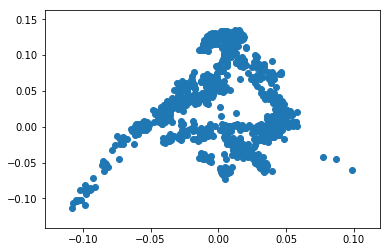

In [20]:
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"])

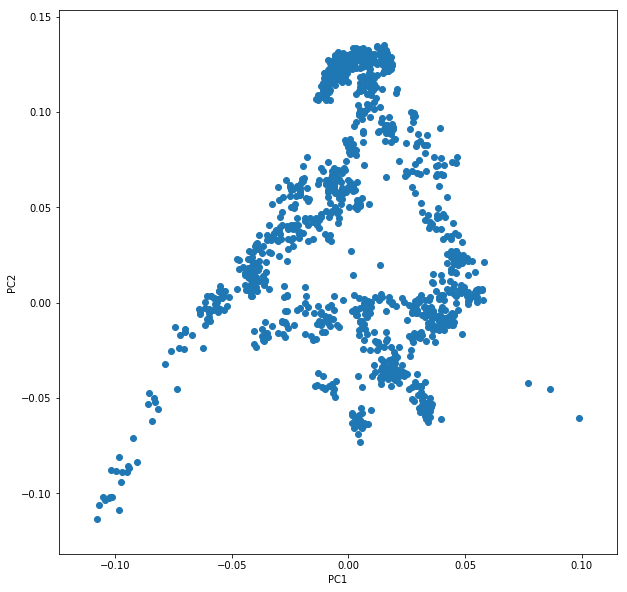

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"])
plt.xlabel("PC1");
plt.ylabel("PC2");

which is not very helpful, because we can't see where each population falls. We can highlight a few populations to get a bit more of a feeling:

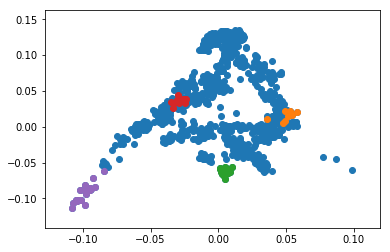

In [23]:
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"])
for pop in ["Finnish", "Sardinian", "Armenian", "BedouinB"]: #French, Finnish, Han, Ami, Nganasan
    d = pcaDat[pcaDat["Group"] == pop]
    plt.scatter(x=d["PC1"], y=d["PC2"], label=pop)

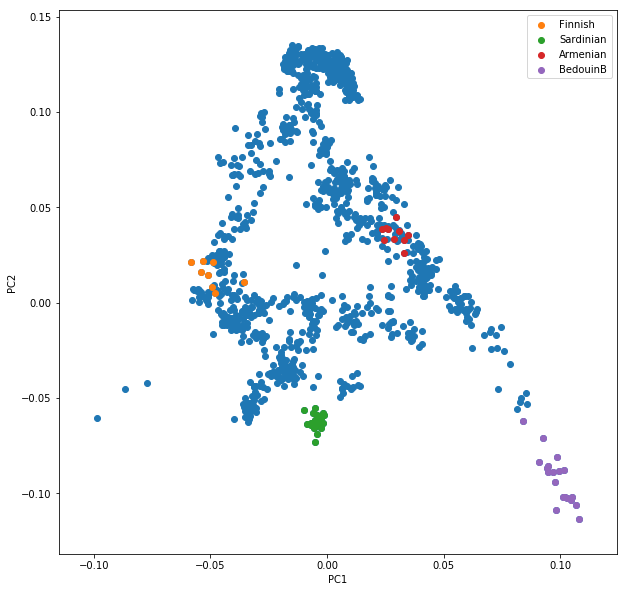

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(x=-pcaDat["PC1"], y=pcaDat["PC2"], label="")
for pop in ["Finnish", "Sardinian", "Armenian", "BedouinB"]:
    d = pcaDat[pcaDat["Group"] == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], label=pop)
plt.legend()
plt.xlabel("PC1");
plt.ylabel("PC2");

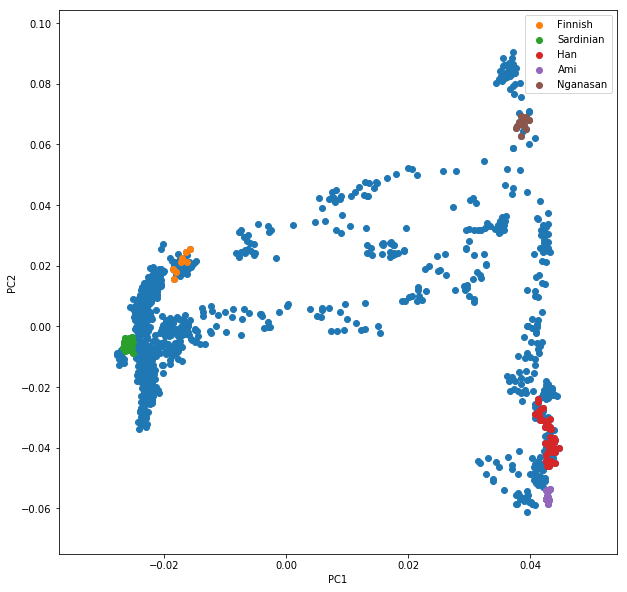

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(x=-pcaDat2["PC1"], y=pcaDat2["PC2"], label="")
for pop in ["Finnish", "Sardinian", "Han", "Ami", "Nganasan"]:
    d = pcaDat2[pcaDat2["Group"] == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], label=pop)
plt.legend()
plt.xlabel("PC1");
plt.ylabel("PC2");

## Showing all populations

OK, but how do we systematically show all the populations? There are too many of those to separate them all by different colors, or by different symbols, so we need to combine colours and symbols and use all the combinations of them to show all the populations. To do that, we first need to load the population list that we want to focus on for now, which are the same lists as used above for running the PCA. In case of the West Eurasian PCA, you can load the file using:

In [34]:
pd.read_csv("/data/popgen_course/WestEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")

,Population
1,Abkhasian
2,Adygei
3,Albanian
4,Armenian
5,Assyrian
6,Balkar
7,Basque
8,BedouinA
9,BedouinB
10,Belarusian


Next, we need to associate a color number and a symbol number with each population. To keep things simple, I would recommend to simply cycle through all combinations automatically. This code snippet looks a bit magic, but it does the job:

In [36]:
popListDat = pd.read_csv("/data/popgen_course/WestEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat)
nCols = 8
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat = popListDat.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)

In [41]:
popListDat2 = pd.read_csv("/data/popgen_course/AllEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat2)
nCols = 8
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat2 = popListDat2.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)

How do we know it worked? Let's look at `popListDat`:

In [39]:
popListDat

,Population,colorIndex,symbolIndex
1,Abkhasian,0,0
2,Adygei,0,1
3,Albanian,0,2
4,Armenian,0,3
5,Assyrian,0,4
6,Balkar,0,5
7,Basque,0,6
8,BedouinA,0,7
9,BedouinB,1,0
10,Belarusian,1,1


OK nice, we now have each population name associated with a unique combination of color-number and symbol-number. We can now plot all points with colors and symbols:

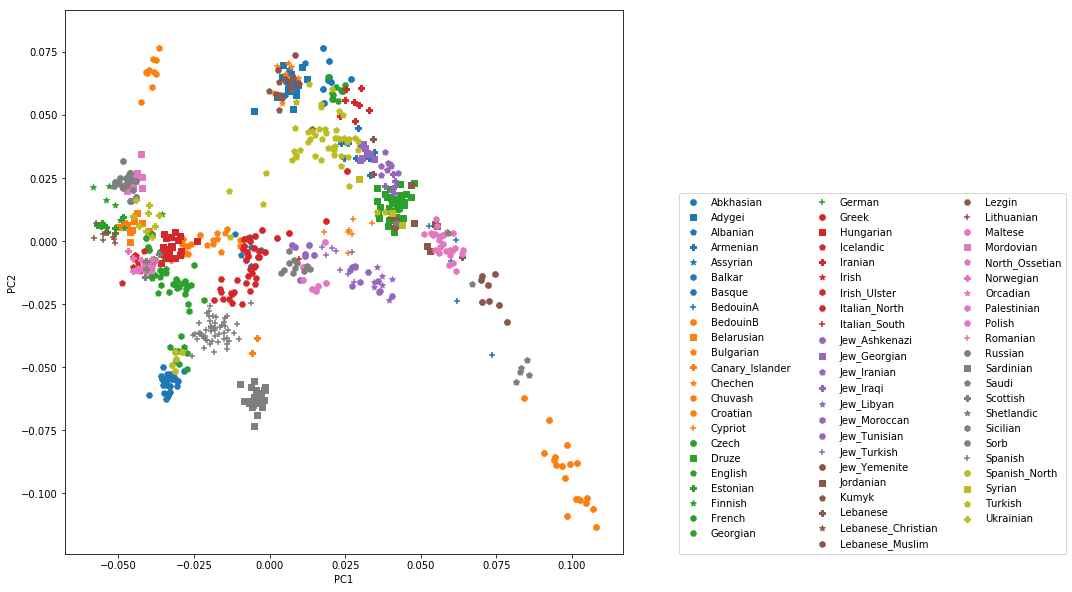

In [43]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "8", "s", "p"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Group == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

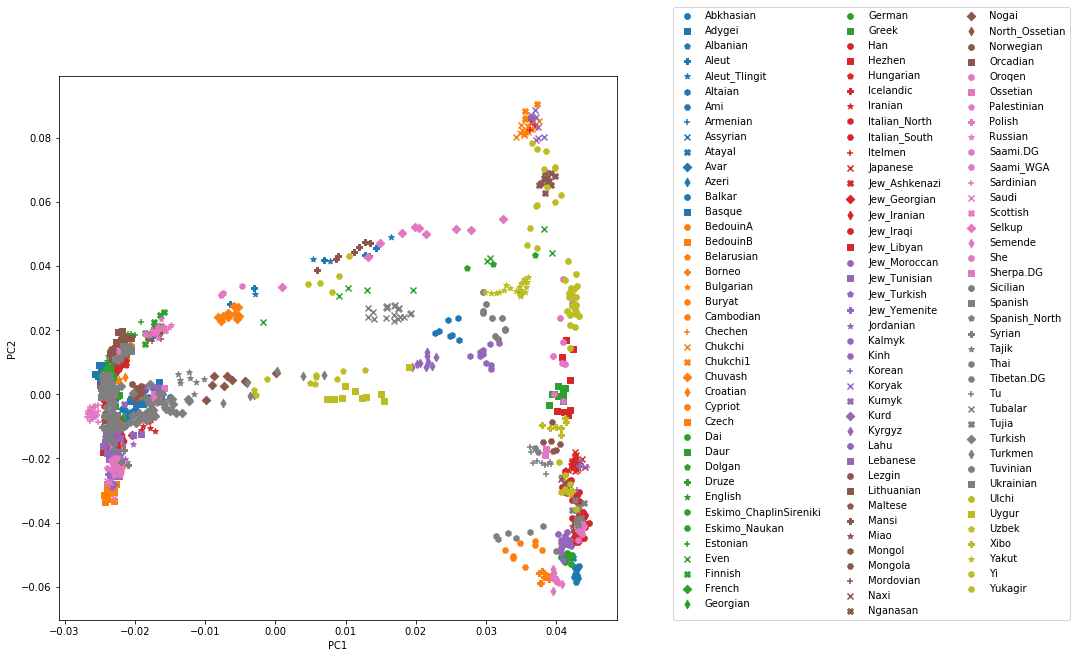

In [44]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "8", "s", "p"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat2.iterrows():
    d = pcaDat2[pcaDat2.Group == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

## Adding ancient populations

Of course, until now we haven't yet included any of the actual ancient test individuals that we want to analyse, but with plot command above you can very easily add them, by simply adding a few manual plot command before the legend, but outside of the foor loop. 

We add the following ancient populations to this plot:
* Levanluhta (two individuals from Finland from the first millenium AD)
* BolshoyOleniOstrov (a group of 3500 year old individuals from Northern Russia).
* WHG (short for Western Hunter-Gatherers, about 8000 years ago)
* LBK_EN (short for Linearbandkeramik Early Neolithic, from about 6,000 years ago)
* Yamnaya_Samara, a late Neolithic population from the Russian Steppe, about 4,800 years ago. 

The first two populations are from a publication on ancient Fennoscandian genomes ([Lamnidis et al. 2018](https://www.nature.com/articles/s41467-018-07483-5)), and are instructive to understand what PCA can be used for. The latter three populations are from two famous publications ([Lazaridis et al. 2014](https://www.nature.com/articles/nature13673) and [Haak et al. 2015](https://www.nature.com/articles/nature14317)). It can be shown that modern European genetic diversity is formed by a mix of three ancestries represented by these ancient groups. To highlight these ancient populations, we plot them in black and using different symbols. While we're at it, we should also add the population called "Saami.DG":

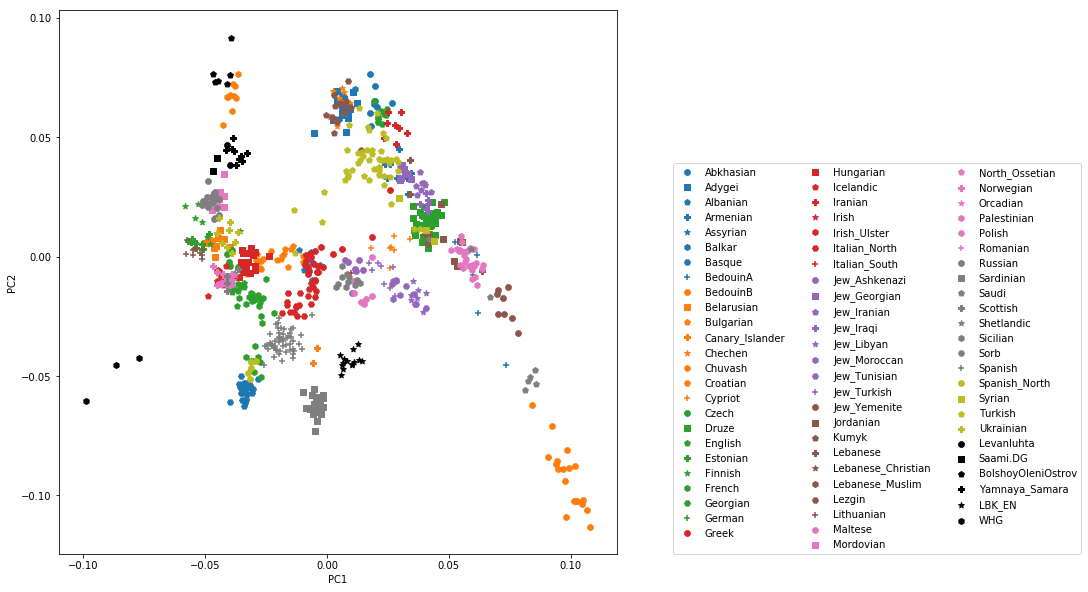

In [11]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "v", "<", ">", "^"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])

for i, pop in enumerate(["Levanluhta", "Saami.DG", "BolshoyOleniOstrov", "Yamnaya_Samara", "LBK_EN", "WHG"]):
    d = pcaDat[pcaDat.Population == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c="black", marker=symbolVec[i], label=pop)
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

OK, so what are we looking at? This is quite a rich plot, of course, and we won't discuss all the details here. I just want to highlight two things. First, you can see that most present-day Europeans are scattered in a relatively tight space in the center of a triangle span up by the WHG on the lower left, LBK_EN on the lower right (seen from European points) and by Yamnaya_Samara (top). Indeed, a widely-accepted model for present-day Europeans assumes these three ancient source populations for all Europeans ([Lazaridis et al. 2014](https://www.nature.com/articles/nature13673) and [Haak et al. 2015](https://www.nature.com/articles/nature14317)).

The second thing that is noteworthy here is that present-day people from Northeastern Europe, such as Finns, Saami and other Uralic speaking populations are "dragged" towards the ancient samples form Bolshoy Oleni Ostrov. Indeed, a recent model published by us assumes that "Siberian" genetic ancestry entered Europe around 4000 years ago as a kind of fourth genetic component on top of the three other components discusseda bove, and is nowadays found in most Uralic speakers in Europe, including Finns, Saami and Estonians.

## East-Eurasian PCA

We can make a similar plot using the all-Eurasian PCA that we have run:

In [44]:
popListDat = pd.read_csv("/data/popgen_course/AllEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat)
nCols = 9
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat = popListDat.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)
popListDat

,Population,colorIndex,symbolIndex
0,Abkhasian,0,0
1,Adygei,0,1
2,Albanian,0,2
3,Aleut,0,3
4,Aleut_Tlingit,0,4
5,Altaian,0,5
6,Ami,0,6
7,Armenian,0,7
8,Assyrian,0,8
9,Atayal,0,9


In [45]:
pcaDat = pd.read_csv("pca.AllEurasia.evec",
                     delim_whitespace=True, skiprows=1, names=names)

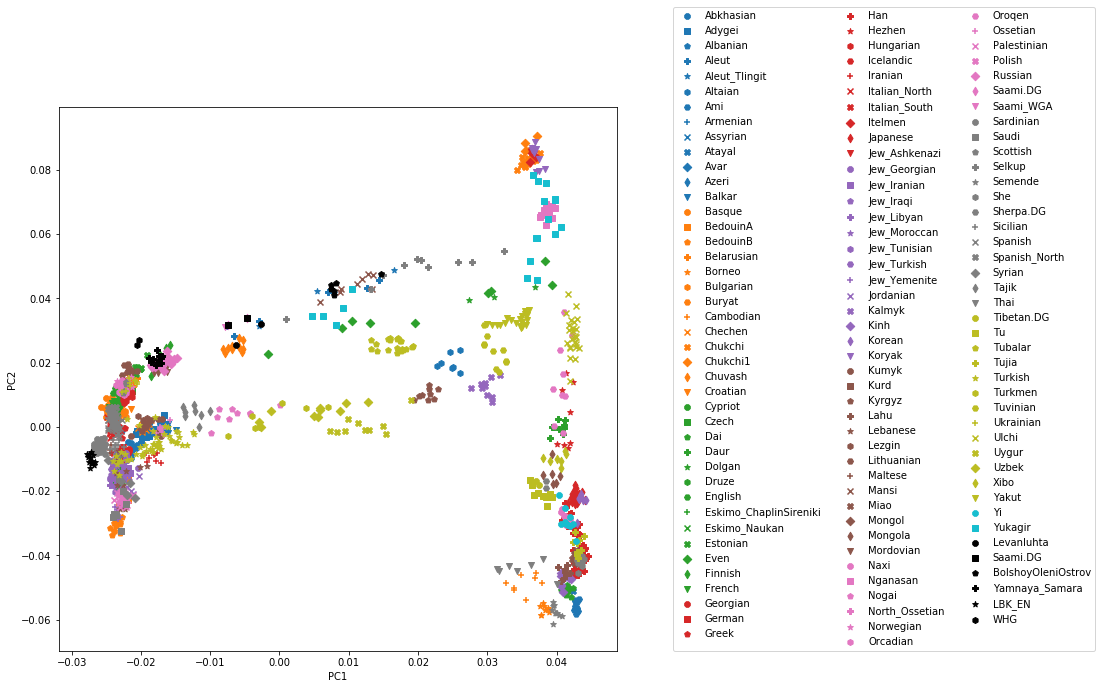

In [46]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "v", "<", ">", "^"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])

for i, pop in enumerate(["Levanluhta", "Saami.DG", "BolshoyOleniOstrov", "Yamnaya_Samara", "LBK_EN", "WHG"]):
    d = pcaDat[pcaDat.Population == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c="black", marker=symbolVec[i], label=pop)

plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

This PCA looks quite different. Here, we have all Western-Eurasian groups squished together on the left side of the plot, and on the right we have East-Asian populations. The plot roughly reflects Geography, with Northern East-Asian people such as the Nganasan on the top-right, and Southern East-Asian people like the Taiwanese Ami on the lower right. Here we can now see that the ancient samples from Russia and Finnland, as well as present-day Uralic populations are actually distributed between East and West, contrary to most other Europeans. This confirms that these group in Europe have quite a distinctive East-Asian genetic ancestry, and we found that it is best represented by the Nganasan ([Lamnidis et al. 2018](https://www.nature.com/articles/s41467-018-07483-5)).